CONNOR NELSON & FAITH CAMP & SANDRA KETA

The dataset that our group is working with is the arrest data of Chapel Hill, North Carolina from the years 2010 to 2016. Features include the date and time the arrest was made, as well as the address of the arrest. The crime committed is given to us as a classification of a felony or a misdemeanor, a UCR code, and a short description of the crime. The arrestee is described with features of age, race, sex, and ethnicity. The dataset has 18,809 rows and 11 features (columns). 

Our goal of analyzing this data set is to figure out if we can determine the age and gender of an arrestee given a crime. Doing this would allow us to see trends in crime among certain age groups, for example: all underage drinking crimes are committed by people under the age of 21. However, our analysis would like to look at less obvious tendencies in arrest data relating to other crimes. We would also like to observe gender’s role in the arrest data, and see if there are any trends in certain crimes only being committed by one gender or the other (or if there are no discrepancies at all). With this analysis, we can get a better picture of what crimes are associated with what demographic in Chapel Hill during this time period by looking at one feature at a time. This is a question of classification. 


In [2]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn     

In [19]:
pam = pa.read_csv('/Users/sandraketa/Desktop/GITHUB/Data_Analysis_Group_Project/police-arrests-made.csv', sep = ';')

The pairplot below only shows two features. This is because only these two are numeric values, whereas the rest are objects. 

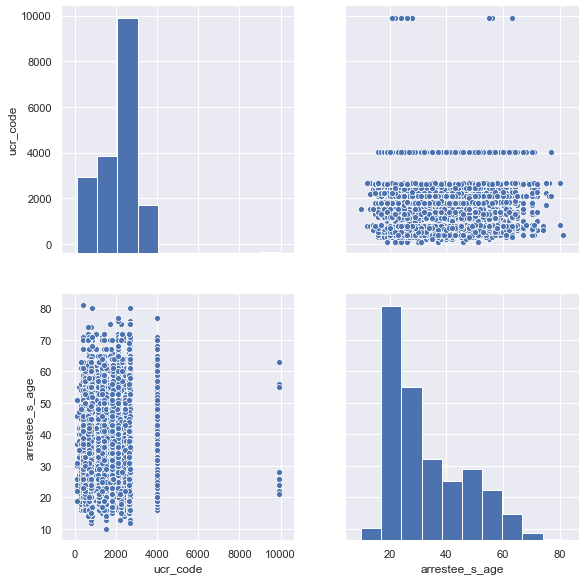

In [21]:
sn.set(style = 'darkgrid')

p = sn.pairplot(pam)   

p.fig.set_size_inches(9, 9)  


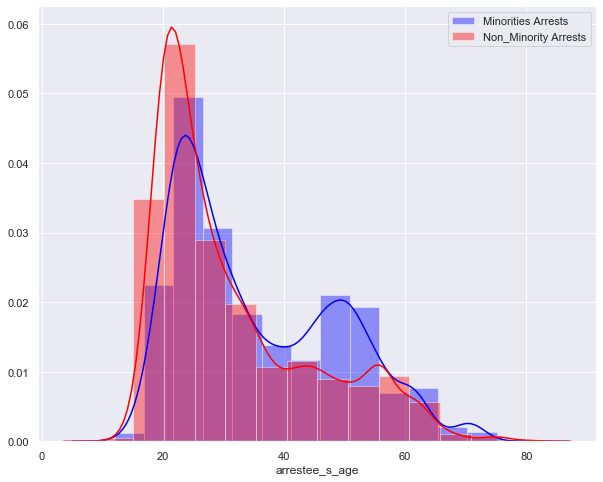

In [22]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='Minorities Arrests', kde=True, bins=14) 
sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='Non_Minority Arrests', kde=True, bins=14)
plt.legend();

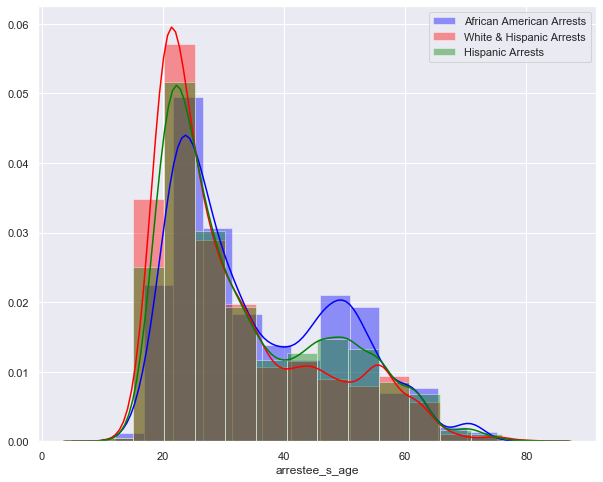

In [23]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='African American Arrests', kde=True, bins=14) 

sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='White & Hispanic Arrests', kde=True, bins=14)

sn.distplot(pam[pam.arrestee_ethnicity!='H'].arrestee_s_age, color='green', 
            label='Hispanic Arrests', kde=True, bins=14)

plt.legend();

In [26]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [27]:
set(pam.arrestee_ethnicity)

{'H', nan}

In [32]:
pamC = pa.read_csv('../police-arrests-made.csv', sep = ';')
pamC = pamC.loc[:, ['arrestee_s_race', 'arrestee_s_age', 'charge_decription']]  # Keep only the columns we want here
pamC.loc[:, 'COUNT'] = 1   # Add a variable for counting unique values
pamC = pamC.groupby(['arrestee_s_race', 'arrestee_s_age', 'charge_description']).sum()   
 # Sum the values after grouping by County, 
       # City, and Provider Type
    
pamC.head()

#pamAn = pamC.reset_index().loc[:, ['charge_description', 'arrestee_s_race', 'COUNT']]  

## Drop the city and go back to a full data frame.

#pamAn = pamAn.groupby(['charge_description', 'arrestee_s_race']).sum()

## Redo the gather but now ignoring City

#pamAn = pamAn.reset_index()

## Set it back to a full data frame.

#pamAn = pamAn[pamAn['arrestee_s_race']=='Preschool Program']

#plt.figure(figsize = (10, 15))
#sn.set(style='darkgrid')
#sn.barplot(x='arrestee_s_race', y='COUNT', data=pamAn)
#plt.title('Crimes divided by Race Count');

KeyError: 'charge_description'

In [33]:
pamC.tail()

,arrestee_s_race,arrestee_s_age,charge_decription,COUNT
18804,B,50.0,NaN,1
18805,B,41.0,NaN,1
18806,W,27.0,NaN,1
18807,W,45.0,NaN,1
18808,W,51.0,NaN,1


In [30]:
pamC.shape

(7281, 1)

In [21]:
pamAn = pamC.reset_index().loc[:, ['', 'arrestee_s_race', 'COUNT']]  

## Drop the city and go back to a full data frame.

pamAn = pamAn.groupby(['charge_description', 'arrestee_s_race']).sum()

## Redo the gather but now ignoring City

pamAn = pamAn.reset_index()

## Set it back to a full data frame.

pamAn = pamAn[pamAn['arrestee_s_race']=='Preschool Program']

plt.figure(figsize = (15, 15))
#sn.set(style='darkgrid')
#sn.barplot(x='arrestee_s_race', y='COUNT', data=pamAn)
#plt.title('Crimes divided by Race Count');

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>